# Danh sách sinh viên:
## 52100413 _ Nguyễn Thái Hòa
## 52100697 _ Phan Thị Thùy Linh
## 52100489 _ Trần Thị Anh Thư

# FFNN

In [61]:
import pandas as pd
import numpy as np

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as ex

#For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#For model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#For model evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report

In [62]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
df.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [65]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# Chuẩn hóa dữ liệu

In [66]:
cat_cols = df[['caa', 'cp', 'restecg', 'exng', 'sex', 'output']].copy()
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [67]:
num_cols = df[['age','trtbps','fbs','thalachh','oldpeak','slp','thall','chol']].copy()
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,63,145,1,150,2.3,0,1,233
1,37,130,0,187,3.5,0,2,250
2,41,130,0,172,1.4,2,2,204
3,56,120,0,178,0.8,2,2,236
4,57,120,0,163,0.6,2,2,354


In [68]:
sc = StandardScaler()
le = LabelEncoder()

In [69]:
for col in cat_cols.columns:
    cat_cols[col] = le.fit_transform(cat_cols[col])
        
sc_num_cols = sc.fit_transform(num_cols)
num_cols = pd.DataFrame(sc_num_cols,columns = num_cols.columns)

In [70]:
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [71]:
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050


In [72]:
df_final = pd.concat([num_cols,cat_cols],axis = 1)
df_final.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol,caa,cp,restecg,exng,sex,output
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334,0,3,0,0,1,1
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199,0,2,1,0,1,1
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773,0,1,0,0,0,1
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357,0,1,1,0,1,1
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050,0,0,1,1,0,1


# Huấn luyện

In [73]:
X = df_final.drop("output",axis = 1)
y = df_final.output

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=142, stratify=y)

In [75]:
# Xây dựng mô hình FFNN
model_ffnn = Sequential()
model_ffnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ffnn.add(Dense(64, activation='relu'))

# Thêm một tầng ẩn nữa với 32 đơn vị

# Lớp cuối cùng với hàm kích hoạt sigmoid cho bài toán phân loại nhị phân
model_ffnn.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình trên tập huấn luyện
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/40
7/7 [==============================] - 1s 23ms/step - loss: 0.7125 - accuracy: 0.5142 - val_loss: 0.6222 - val_accuracy: 0.7033
Epoch 2/40
7/7 [==============================] - 0s 6ms/step - loss: 0.5745 - accuracy: 0.8066 - val_loss: 0.5300 - val_accuracy: 0.8132
Epoch 3/40
7/7 [==============================] - 0s 6ms/step - loss: 0.4914 - accuracy: 0.8302 - val_loss: 0.4657 - val_accuracy: 0.8681
Epoch 4/40
7/7 [==============================] - 0s 6ms/step - loss: 0.4385 - accuracy: 0.8208 - val_loss: 0.4241 - val_accuracy: 0.8462
Epoch 5/40
7/7 [==============================] - 0s 6ms/step - loss: 0.4031 - accuracy: 0.8255 - val_loss: 0.4005 - val_accuracy: 0.8571
Epoch 6/40
7/7 [==============================] - 0s 6ms/step - loss: 0.3800 - accuracy: 0.8396 - val_loss: 0.3878 - val_accuracy: 0.8681
Epoch 7/40
7/7 [==============================] - 0s 6ms/step - loss: 0.3645 - accuracy: 0.8585 - val_loss: 0.3805 - val_accuracy: 0.8681
Epoch 8/40
7/7 [=================

In [76]:
y_pred = model_ffnn.predict(X_test)
y_pred = [1 if y>=0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy: %.2f%%" % (accuracy*100))

3/3 [==============================] - 0s 1ms/step
Model Accuracy: 83.52%


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        41
           1       0.81      0.92      0.86        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



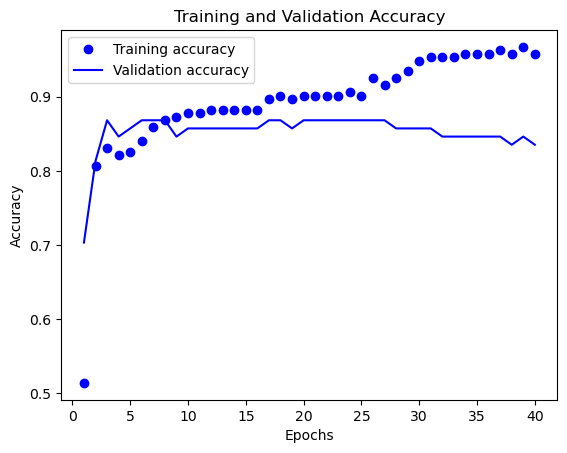

In [78]:
# Lấy thông tin lịch sử của FFNN
accuracy = history_ffnn.history['accuracy']
val_accuracy = history_ffnn.history['val_accuracy']
loss = history_ffnn.history['loss']
val_loss = history_ffnn.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Vẽ đồ thị cho độ chính xác
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Hiển thị biểu đồ
plt.show()


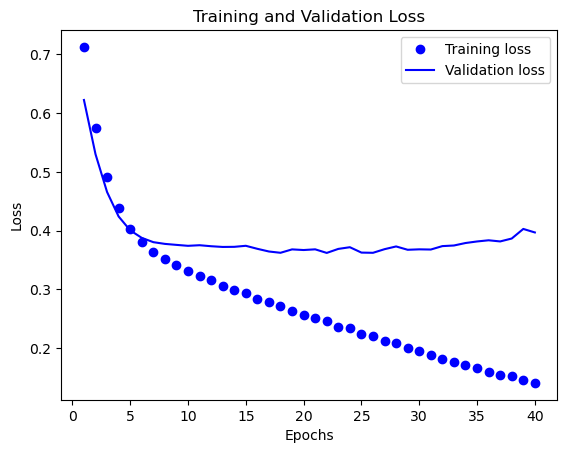

In [79]:
# Vẽ đồ thị cho mất mát
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Reccurent Neural Network 

In [80]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import classification_report, accuracy_score

In [81]:
# Xây dựng mô hình RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model_rnn.add(Dense(1, activation='sigmoid'))

In [82]:
# Biên dịch mô hình
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
# Reshape dữ liệu để phù hợp với đầu vào của mô hình RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [84]:
# Huấn luyện mô hình
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=40, batch_size=32, validation_data=(X_test_rnn, y_test))


Epoch 1/40
7/7 [==============================] - 1s 36ms/step - loss: 0.7270 - accuracy: 0.3915 - val_loss: 0.6925 - val_accuracy: 0.4066
Epoch 2/40
7/7 [==============================] - 0s 7ms/step - loss: 0.6919 - accuracy: 0.4717 - val_loss: 0.6652 - val_accuracy: 0.6154
Epoch 3/40
7/7 [==============================] - 0s 8ms/step - loss: 0.6655 - accuracy: 0.6415 - val_loss: 0.6395 - val_accuracy: 0.7253
Epoch 4/40
7/7 [==============================] - 0s 7ms/step - loss: 0.6375 - accuracy: 0.7028 - val_loss: 0.6114 - val_accuracy: 0.7582
Epoch 5/40
7/7 [==============================] - 0s 7ms/step - loss: 0.6057 - accuracy: 0.7547 - val_loss: 0.5780 - val_accuracy: 0.7802
Epoch 6/40
7/7 [==============================] - 0s 7ms/step - loss: 0.5682 - accuracy: 0.7642 - val_loss: 0.5415 - val_accuracy: 0.7802
Epoch 7/40
7/7 [==============================] - 0s 7ms/step - loss: 0.5253 - accuracy: 0.7689 - val_loss: 0.5027 - val_accuracy: 0.7473
Epoch 8/40
7/7 [=================

In [85]:
# Đánh giá mô hình
y_pred_rnn = model_rnn.predict(X_test_rnn)
y_pred_rnn = [1 if y >= 0.5 else 0 for y in y_pred_rnn]
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)

print("RNN Model Accuracy: %.2f%%" % (accuracy_rnn * 100))
print(classification_report(y_test, y_pred_rnn))

3/3 [==============================] - 0s 2ms/step
RNN Model Accuracy: 82.42%
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        41
           1       0.80      0.90      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



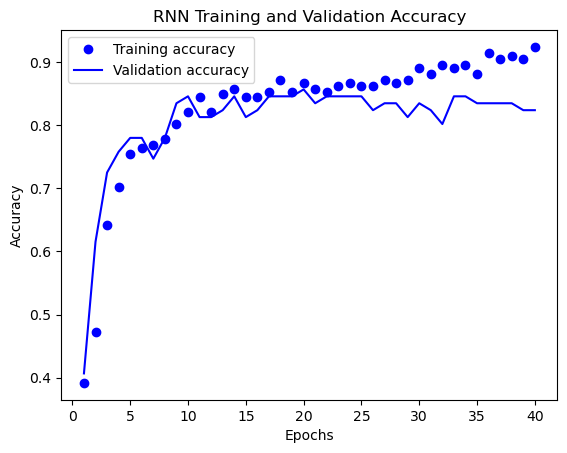

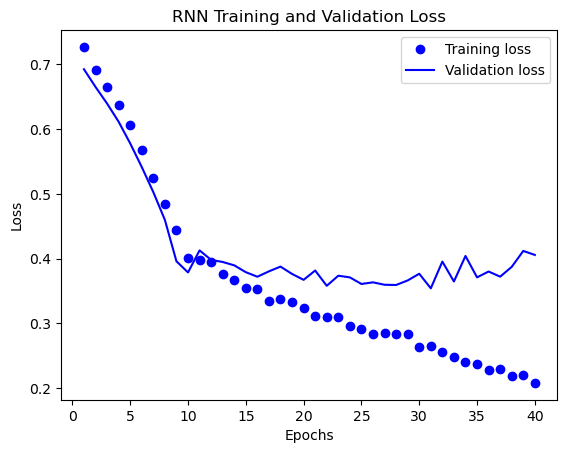

In [86]:
# Lấy thông tin lịch sử của RNN
accuracy_rnn = history_rnn.history['accuracy']
val_accuracy_rnn = history_rnn.history['val_accuracy']
loss_rnn = history_rnn.history['loss']
val_loss_rnn = history_rnn.history['val_loss']
epochs_rnn = range(1, len(accuracy_rnn) + 1)

# Vẽ đồ thị cho độ chính xác
plt.plot(epochs_rnn, accuracy_rnn, 'bo', label='Training accuracy')
plt.plot(epochs_rnn, val_accuracy_rnn, 'b', label='Validation accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Vẽ đồ thị cho mất mát
plt.plot(epochs_rnn, loss_rnn, 'bo', label='Training loss')
plt.plot(epochs_rnn, val_loss_rnn, 'b', label='Validation loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Hiển thị biểu đồ
plt.show()




# So sánh

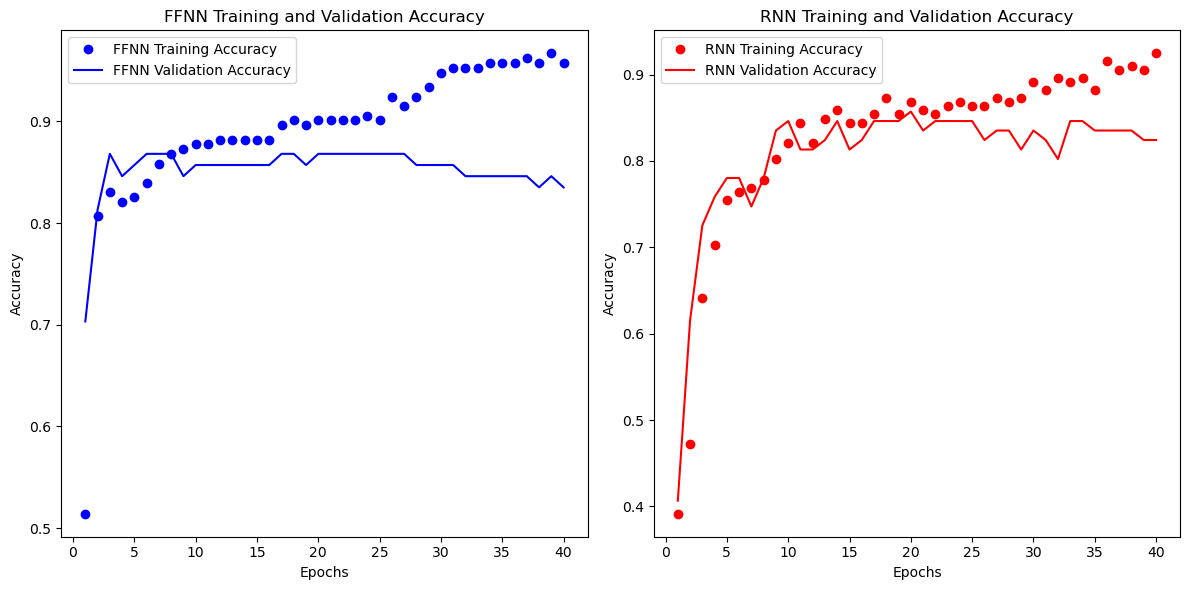

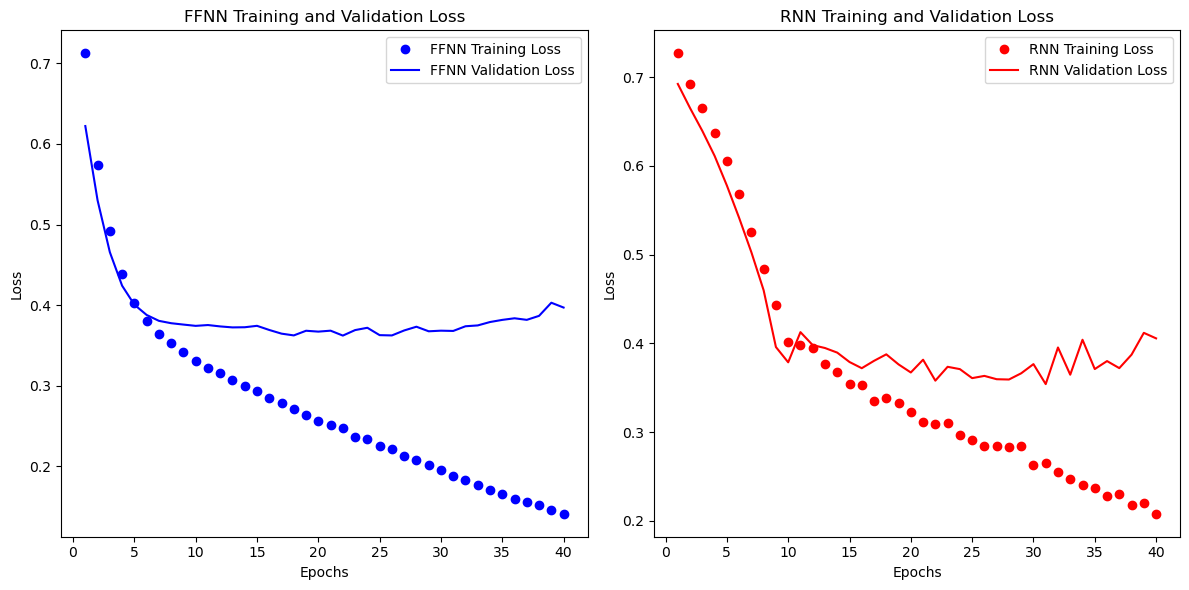

In [87]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho độ chính xác
plt.figure(figsize=(12, 6))

# Biểu đồ cho FFNN
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='FFNN Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='FFNN Validation Accuracy')
plt.title('FFNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Biểu đồ cho RNN
plt.subplot(1, 2, 2)
plt.plot(epochs_rnn, accuracy_rnn, 'ro', label='RNN Training Accuracy')
plt.plot(epochs_rnn, val_accuracy_rnn, 'r', label='RNN Validation Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho mất mát
plt.figure(figsize=(12, 6))

# Biểu đồ cho FFNN
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='FFNN Training Loss')
plt.plot(epochs, val_loss, 'b', label='FFNN Validation Loss')
plt.title('FFNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ cho RNN
plt.subplot(1, 2, 2)
plt.plot(epochs_rnn, loss_rnn, 'ro', label='RNN Training Loss')
plt.plot(epochs_rnn, val_loss_rnn, 'r', label='RNN Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
